In [0]:
from keras.datasets import mnist

In [70]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


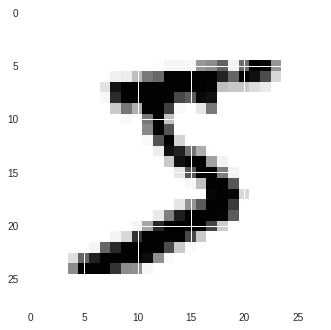

In [94]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0])

In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],1,28,28)
xtest = xtest.reshape(xtest.shape[0],1,28,28)

In [0]:
xtrain.astype('float32')
xtest.astype('float32')
xtrain = xtrain/255
xtest = xtest/255

In [0]:
Ytrain = np_utils.to_categorical(ytrain,10)
Ytest = np_utils.to_categorical(ytest,10)

In [6]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
import pandas as pd
import io
train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
test = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

In [0]:
import keras
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy


In [9]:
keras.backend.set_image_dim_ordering('th')
keras.backend.image_dim_ordering()

'th'

In [0]:
x1 = train.iloc[:,1:].values
y1 = train.label.values
x1 = x1/255
test1 = test.values/255

In [0]:
import numpy as np
x12 = x1.reshape(x1.shape[0],28,28)
test1 = test1.reshape(test1.shape[0],28,28)

In [0]:
kaggle_train = x12.reshape(x12.shape[0],1,28,28)
kaggle_test = test1.reshape(test1.shape[0],1,28,28)

In [0]:
from keras.utils import np_utils
ytrain_kaggle = np_utils.to_categorical(y1,10)

In [74]:
kaggle_model = Sequential([
    Convolution2D(32,kernel_size=(3,3),input_shape=(1,28,28),activation='relu',padding='same'),
    Convolution2D(32,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
kaggle_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 28, 28)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 28, 28)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 14, 14)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 14, 14)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total para

In [0]:
kaggle_model.compile(loss = 'categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [77]:
kaggle_model.fit(xtrain,Ytrain,batch_size=100,epochs=20,shuffle=True,verbose=1,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 9s 159us/step - loss: 0.1864 - acc: 0.9444 - val_loss: 0.0628 - val_acc: 0.9813
Epoch 2/20
54000/54000 [==============================] - 8s 148us/step - loss: 0.0555 - acc: 0.9829 - val_loss: 0.0537 - val_acc: 0.9860
Epoch 3/20
39100/54000 [====================>.........] - ETA: 2s - loss: 0.0378 - acc: 0.9879

54000/54000 [==============================] - 8s 148us/step - loss: 0.0376 - acc: 0.9880 - val_loss: 0.0416 - val_acc: 0.9895
Epoch 4/20
54000/54000 [==============================] - 8s 147us/step - loss: 0.0285 - acc: 0.9906 - val_loss: 0.0396 - val_acc: 0.9905
Epoch 5/20
54000/54000 [==============================] - 8s 147us/step - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0422 - val_acc: 0.9897
Epoch 6/20
13700/54000 [======>.......................] - ETA: 5s - loss: 0.0145 - acc: 0.9949

54000/54000 [==============================] - 8s 146us/step - loss: 0.0181 - acc: 0.9937 - val_loss: 0.0448 - val_acc: 0.9885
Epoch 7/20
54000/54000 [==============================] - 8s 149us/step - loss: 0.0136 - acc: 0.9953 - val_loss: 0.0398 - val_acc: 0.9900
Epoch 8/20
54000/54000 [==============================] - 8s 148us/step - loss: 0.0141 - acc: 0.9952 - val_loss: 0.0406 - val_acc: 0.9900
Epoch 9/20
 8900/54000 [===>..........................] - ETA: 6s - loss: 0.0093 - acc: 0.9965

54000/54000 [==============================] - 8s 149us/step - loss: 0.0098 - acc: 0.9967 - val_loss: 0.0421 - val_acc: 0.9897
Epoch 10/20
54000/54000 [==============================] - 8s 149us/step - loss: 0.0090 - acc: 0.9969 - val_loss: 0.0426 - val_acc: 0.9912
Epoch 11/20
54000/54000 [==============================] - 8s 148us/step - loss: 0.0092 - acc: 0.9970 - val_loss: 0.0368 - val_acc: 0.9908
Epoch 12/20
 7700/54000 [===>..........................] - ETA: 6s - loss: 0.0056 - acc: 0.9981

54000/54000 [==============================] - 8s 147us/step - loss: 0.0076 - acc: 0.9972 - val_loss: 0.0364 - val_acc: 0.9918
Epoch 13/20
54000/54000 [==============================] - 8s 147us/step - loss: 0.0073 - acc: 0.9977 - val_loss: 0.0385 - val_acc: 0.9920
Epoch 14/20
54000/54000 [==============================] - 8s 148us/step - loss: 0.0067 - acc: 0.9979 - val_loss: 0.0499 - val_acc: 0.9903
Epoch 15/20
 7500/54000 [===>..........................] - ETA: 6s - loss: 0.0060 - acc: 0.9976

54000/54000 [==============================] - 8s 148us/step - loss: 0.0064 - acc: 0.9978 - val_loss: 0.0367 - val_acc: 0.9918
Epoch 16/20
54000/54000 [==============================] - 8s 148us/step - loss: 0.0073 - acc: 0.9976 - val_loss: 0.0328 - val_acc: 0.9930
Epoch 17/20
54000/54000 [==============================] - 8s 147us/step - loss: 0.0049 - acc: 0.9983 - val_loss: 0.0424 - val_acc: 0.9920
Epoch 18/20
 7600/54000 [===>..........................] - ETA: 6s - loss: 0.0066 - acc: 0.9976

54000/54000 [==============================] - 8s 146us/step - loss: 0.0044 - acc: 0.9983 - val_loss: 0.0411 - val_acc: 0.9922
Epoch 19/20
54000/54000 [==============================] - 8s 147us/step - loss: 0.0042 - acc: 0.9986 - val_loss: 0.0464 - val_acc: 0.9927
Epoch 20/20
54000/54000 [==============================] - 8s 146us/step - loss: 0.0048 - acc: 0.9984 - val_loss: 0.0416 - val_acc: 0.9930


In [0]:
predictions = kaggle_model.predict_classes(kaggle_test,batch_size=100)

In [79]:
print(predictions)

[2 0 9 ... 3 9 2]


In [0]:
result_dic = {'ImageId':[i for i in range(1,kaggle_test.shape[0]+1)],'label':predictions}

In [0]:
df = pd.DataFrame(result_dic)

In [35]:
print(df)

       ImageId  label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
5            6      7
6            7      0
7            8      3
8            9      0
9           10      3
10          11      5
11          12      7
12          13      4
13          14      0
14          15      4
15          16      3
16          17      3
17          18      1
18          19      9
19          20      0
20          21      9
21          22      1
22          23      1
23          24      5
24          25      7
25          26      4
26          27      2
27          28      7
28          29      4
29          30      7
...        ...    ...
27970    27971      5
27971    27972      0
27972    27973      4
27973    27974      8
27974    27975      0
27975    27976      3
27976    27977      6
27977    27978      0
27978    27979      1
27979    27980      9
27980    27981      3
27981    27982      1
27982    27983      4
27983    2

In [0]:
df.to_csv('submission.csv',index=False)

In [0]:
files.download('submission.csv')